<a href="https://www.kaggle.com/code/aabdollahii/heart-attack-prediction-90-roc?scriptVersionId=257349855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# understanding data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/heart-attack-prediction/data.csv")

In [2]:
# Step 3: Quick structure check
print("Shape of dataset:", df.shape)
print("First 20 rows:")
display(df.head(20))


Shape of dataset: (294, 14)
First 20 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB
None


In [4]:
print(df.isnull().sum())


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


# Data Preprocessing & Feature Engineering

In [5]:
# Count missing values in the problematic features
missing_analysis = pd.DataFrame({
    'feature': ['slope', 'thal', 'ca'],
    'total_missing': [
        (df['slope'] == '?').sum(),
        (df['thal'] == '?').sum(),
        (df['ca'] == '?').sum()
    ],
    'missing_percentage': [
        ((df['slope'] == '?').sum() / len(df)) * 100,
        ((df['thal'] == '?').sum() / len(df)) * 100,
        ((df['ca'] == '?').sum() / len(df)) * 100
    ]
})

print("📊 Missing Value Analysis:")
print(missing_analysis)

📊 Missing Value Analysis:
  feature  total_missing  missing_percentage
0   slope            190           64.625850
1    thal            266           90.476190
2      ca            291           98.979592


In [6]:
# Drop the problematic columns
df_clean = df.drop(['slope', 'thal', 'ca'], axis=1)

print(f"Original shape: {df.shape}")
print(f"After dropping: {df_clean.shape}")
print("✅ Dropped slope, thal, and ca columns due to excessive missing data")

Original shape: (294, 14)
After dropping: (294, 11)
✅ Dropped slope, thal, and ca columns due to excessive missing data


* As everything was missing and not enough good in those three columns we had to drop them.

# ML Pipeline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [8]:
# Handle any remaining minor missing values
df_clean = df_clean.dropna()  # Since we removed major missingness, this should be safe

print("Final Clean Dataset:")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {df_clean.columns.tolist()}")

Final Clean Dataset:
Shape: (294, 11)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'num       ']


In [9]:
df_clean.columns = df_clean.columns.str.strip()

# Verify the fix
print("✅ Column names after stripping:")
print(df_clean.columns.tolist())

✅ Column names after stripping:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'num']


In [10]:
df_clean = df_clean.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Create binary target
df_clean['heart_disease'] = (df_clean['num'] > 0).astype(int)

# Separate features and target
X = df_clean.drop(['num', 'heart_disease'], axis=1)
y = df_clean['heart_disease']

In [11]:
print(f" Target distribution:")
print(y.value_counts())
print(f"Baseline accuracy: {max(y.value_counts(normalize=True)):.3f}")

 Target distribution:
heart_disease
0    188
1    106
Name: count, dtype: int64
Baseline accuracy: 0.639


In [12]:
# First, let's identify where these '?' values are hiding
print("🔍 Checking for remaining '?' values in numerical columns:")
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_cols:
    if col in df_clean.columns:
        question_marks = (df_clean[col] == '?').sum()
        if question_marks > 0:
            print(f"  {col}: {question_marks} '?' values found")
        else:
            print(f"  {col}: No '?' values ✅")

# Also check categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
for col in categorical_cols:
    if col in df_clean.columns:
        question_marks = (df_clean[col] == '?').sum()
        if question_marks > 0:
            print(f"  {col}: {question_marks} '?' values found")


🔍 Checking for remaining '?' values in numerical columns:
  age: No '?' values ✅
  trestbps: 1 '?' values found
  chol: 23 '?' values found
  thalach: 1 '?' values found
  oldpeak: No '?' values ✅
  fbs: 8 '?' values found
  restecg: 1 '?' values found
  exang: 1 '?' values found


In [13]:
import pandas as pd
import numpy as np

def clean_heart_disease_data(df):
    """
    Comprehensive cleaning function for UCI Heart Disease dataset
    """
    # Make a copy to avoid modifying original
    df_clean = df.copy()
    
    # Step 1: Drop high-missing columns
    columns_to_drop = ['slope', 'thal', 'ca']
    df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')
    
    # Step 2: Clean column names
    df_clean.columns = df_clean.columns.str.strip()
    
    # Step 3: Replace '?' with NaN for proper handling
    df_clean = df_clean.replace('?', np.nan)
    
    # Step 4: Convert numerical columns to proper numeric type
    numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    for col in numerical_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Step 5: Convert categorical columns (handle any remaining '?')
    categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
    for col in categorical_cols:
        if col in df_clean.columns:
            # Replace any non-numeric values with NaN, then convert to numeric
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Step 6: Drop rows with any remaining missing values
    initial_rows = len(df_clean)
    df_clean = df_clean.dropna()
    final_rows = len(df_clean)
    
    print(f"📊 Data cleaning completed:")
    print(f"  Rows removed due to missing values: {initial_rows - final_rows}")
    print(f"  Final dataset shape: {df_clean.shape}")
    
    # Step 7: Create binary target
    df_clean['heart_disease'] = (df_clean['num'] > 0).astype(int)
    
    return df_clean

# Apply the comprehensive cleaning
df_clean = clean_heart_disease_data(df)

# Verify no more '?' values
print(" Verification - No more '?' values:")
for col in df_clean.columns:
    if (df_clean[col] == '?').any():
        print(f"  WARNING: Still found '?' in {col}")
    else:
        print(f"  {col}: Clean ✅")


📊 Data cleaning completed:
  Rows removed due to missing values: 33
  Final dataset shape: (261, 11)
 Verification - No more '?' values:
  age: Clean ✅
  sex: Clean ✅
  cp: Clean ✅
  trestbps: Clean ✅
  chol: Clean ✅
  fbs: Clean ✅
  restecg: Clean ✅
  thalach: Clean ✅
  exang: Clean ✅
  oldpeak: Clean ✅
  num: Clean ✅
  heart_disease: Clean ✅


In [14]:
# Create binary target (using the clean 'num' column)
df_clean['heart_disease'] = (df_clean['num'] > 0).astype(int)

print("🎯 Target Distribution:")
print(df_clean['heart_disease'].value_counts())
print(f"Baseline accuracy: {max(df_clean['heart_disease'].value_counts(normalize=True)):.3f}")

# Separate features and target
X = df_clean.drop(['num', 'heart_disease'], axis=1)
y = df_clean['heart_disease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Dataset Split:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

# Scale the numerical features
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("✅ Feature scaling completed successfully!")

🎯 Target Distribution:
heart_disease
0    163
1     98
Name: count, dtype: int64
Baseline accuracy: 0.625
 Dataset Split:
Training set: (208, 10)
Test set: (53, 10)
✅ Feature scaling completed successfully!


In [16]:
# First, let's import ALL required models and utilities
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  # If you have xgboost installed
# If XGBoost is not available, we'll use an alternative

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Check if XGBoost is available, otherwise use Gradient Boosting as alternative
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("⚠️  XGBoost not available. Using Gradient Boosting as alternative.")


In [21]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss') if xgb_available 
              else GradientBoostingClassifier(n_estimators=150, random_state=42, subsample=0.8),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, class_weight='balanced', probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

In [22]:
# For models that need scaling, create pipelines
scaling_models = ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']
model_pipelines = {}

for name, model in models.items():
    if name in scaling_models:
        # Create pipeline with scaling for models that need it
        model_pipelines[name] = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
    else:
        # Tree-based models don't need scaling
        model_pipelines[name] = model

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = make_scorer(accuracy_score)

# Perform cross-validation for each model
cv_results = {}
print(" Running 5-Fold Cross-Validation...")
for name, model in model_pipelines.items():
    try:
        cv_scores = cross_val_score(model, X_train, y_train, 
                                  cv=cv, scoring=scoring, n_jobs=-1)
        cv_results[name] = {
            'mean_accuracy': cv_scores.mean(),
            'std_accuracy': cv_scores.std(),
            'all_scores': cv_scores
        }
        print(f"✅ {name:25s}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    except Exception as e:
        print(f" {name:25s}: Error - {str(e)}")
        cv_results[name] = {'mean_accuracy': 0, 'std_accuracy': 0, 'all_scores': []}

# Display results in sorted order
print(" Cross-Validation Results (Sorted by Performance):")
print("=" * 60)
sorted_results = sorted(cv_results.items(), key=lambda x: x[1]['mean_accuracy'], reverse=True)

for name, results in sorted_results:
    print(f"{name:25s}: {results['mean_accuracy']:.4f} ± {results['std_accuracy']:.4f}")

# Identify best model
best_model_name = sorted_results[0][0]
best_cv_score = sorted_results[0][1]['mean_accuracy']
print(f" Best Model: {best_model_name} (CV Accuracy: {best_cv_score:.4f})")

 Running 5-Fold Cross-Validation...
✅ Logistic Regression      : 0.7840 ± 0.0386
✅ Random Forest            : 0.7692 ± 0.0418
✅ Gradient Boosting        : 0.7451 ± 0.0298
✅ XGBoost                  : 0.7454 ± 0.0502
✅ AdaBoost                 : 0.7353 ± 0.0664
✅ SVM                      : 0.7743 ± 0.0306
✅ K-Nearest Neighbors      : 0.7791 ± 0.0259
✅ Extra Trees              : 0.7548 ± 0.0314
 Cross-Validation Results (Sorted by Performance):
Logistic Regression      : 0.7840 ± 0.0386
K-Nearest Neighbors      : 0.7791 ± 0.0259
SVM                      : 0.7743 ± 0.0306
Random Forest            : 0.7692 ± 0.0418
Extra Trees              : 0.7548 ± 0.0314
XGBoost                  : 0.7454 ± 0.0502
Gradient Boosting        : 0.7451 ± 0.0298
AdaBoost                 : 0.7353 ± 0.0664
 Best Model: Logistic Regression (CV Accuracy: 0.7840)


# Visualization 

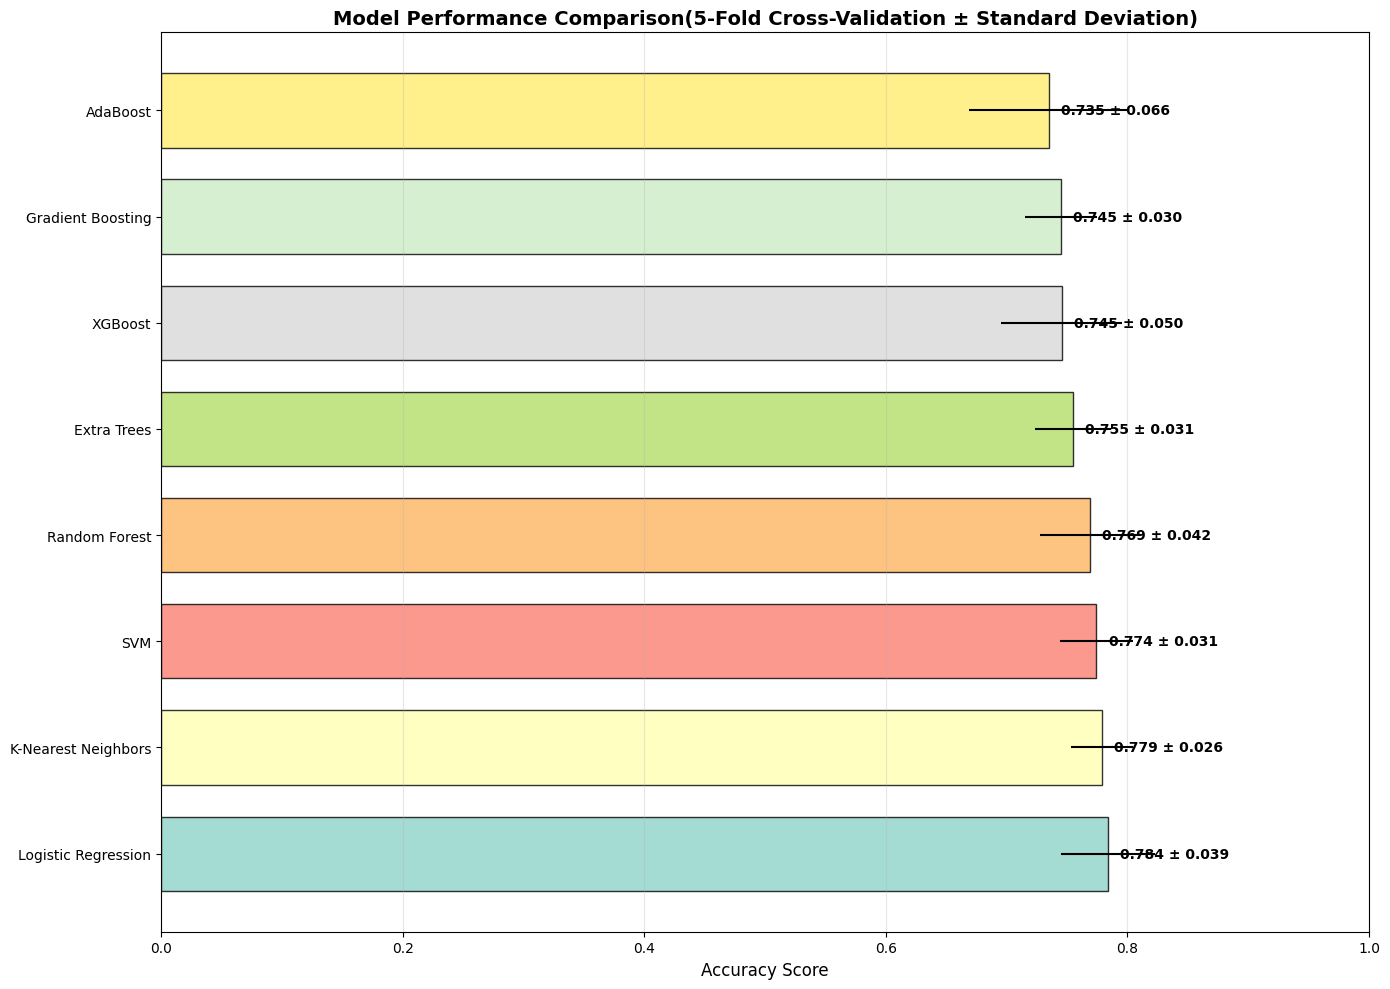

 Detailed CV Scores for Logistic Regression:
  Fold 1: 0.7619
  Fold 2: 0.7381
  Fold 3: 0.7857
  Fold 4: 0.8537
  Fold 5: 0.7805


In [24]:
# Create visualization of model performance
plt.figure(figsize=(14, 10))
model_names = [name for name, _ in sorted_results]
mean_scores = [results['mean_accuracy'] for _, results in sorted_results]
std_scores = [results['std_accuracy'] for _, results in sorted_results]

colors = plt.cm.Set3(np.linspace(0, 1, len(model_names)))
bars = plt.barh(range(len(model_names)), mean_scores, xerr=std_scores, 
                alpha=0.8, color=colors, edgecolor='black', height=0.7)

plt.yticks(range(len(model_names)), model_names)
plt.xlabel('Accuracy Score', fontsize=12)
plt.title('Model Performance Comparison(5-Fold Cross-Validation ± Standard Deviation)', fontsize=14, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (mean, std) in enumerate(zip(mean_scores, std_scores)):
    plt.text(mean + 0.01, i, f'{mean:.3f} ± {std:.3f}', 
             va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Show individual fold scores for the best model
print(f" Detailed CV Scores for {best_model_name}:")
best_scores = cv_results[best_model_name]['all_scores']
for fold, score in enumerate(best_scores, 1):
    print(f"  Fold {fold}: {score:.4f}")


# Train best model on full data 

In [25]:
# Train the best model on full training data
print(f" Training {best_model_name} on full training set...")
if best_model_name in model_pipelines:
    best_model = model_pipelines[best_model_name]
else:
    best_model = models[best_model_name]

best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"📊 Final Performance Comparison:")
print(f"  Cross-Validation Accuracy: {best_cv_score:.4f}")
print(f"  Test Set Accuracy: {test_accuracy:.4f}")
print(f"  Generalization Gap: {abs(best_cv_score - test_accuracy):.4f}")

if abs(best_cv_score - test_accuracy) < 0.05:
    print("Good generalization: CV and test performance are close!")
else:
    print("Potential overfitting: Large gap between CV and test performance")

print(" Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))


 Training Logistic Regression on full training set...
📊 Final Performance Comparison:
  Cross-Validation Accuracy: 0.7840
  Test Set Accuracy: 0.8491
  Generalization Gap: 0.0651
Potential overfitting: Large gap between CV and test performance
 Detailed Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.88      0.88        33
     Disease       0.80      0.80      0.80        20

    accuracy                           0.85        53
   macro avg       0.84      0.84      0.84        53
weighted avg       0.85      0.85      0.85        53



# random forest and xgboost

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("Training Random Forest Model...")
print("=" * 50)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"📊 Random Forest Performance:")
print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  ROC AUC: {rf_auc:.4f}")

print(" Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease']))

# Feature Importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(" Top 10 Most Important Features (Random Forest):")
print(rf_feature_importance.head(10))

print(" Training XGBoost Model...")
print("=" * 50)

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"📊 XGBoost Performance:")
print(f"  Accuracy: {xgb_accuracy:.4f}")
print(f"  ROC AUC: {xgb_auc:.4f}")

print("📋 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Disease', 'Disease']))

# Feature Importance for XGBoost
xgb_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("🎯 Top 10 Most Important Features (XGBoost):")
print(xgb_feature_importance.head(10))


Training Random Forest Model...
📊 Random Forest Performance:
  Accuracy: 0.8491
  ROC AUC: 0.9061
 Random Forest Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.88      0.88        33
     Disease       0.80      0.80      0.80        20

    accuracy                           0.85        53
   macro avg       0.84      0.84      0.84        53
weighted avg       0.85      0.85      0.85        53

 Top 10 Most Important Features (Random Forest):
    feature  importance
2        cp    0.208880
9   oldpeak    0.175339
8     exang    0.135324
7   thalach    0.110284
4      chol    0.106972
0       age    0.097531
3  trestbps    0.083691
1       sex    0.050899
5       fbs    0.016394
6   restecg    0.014685
 Training XGBoost Model...
📊 XGBoost Performance:
  Accuracy: 0.8302
  ROC AUC: 0.8803
📋 XGBoost Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.88      0.87      

📈 Model Comparison Summary:
Model                Accuracy     ROC AUC     
--------------------------------------------------
Random Forest        0.8491      0.9061
XGBoost              0.8302      0.8803
 Best Performing Model: Random Forest (Accuracy: 0.8491)


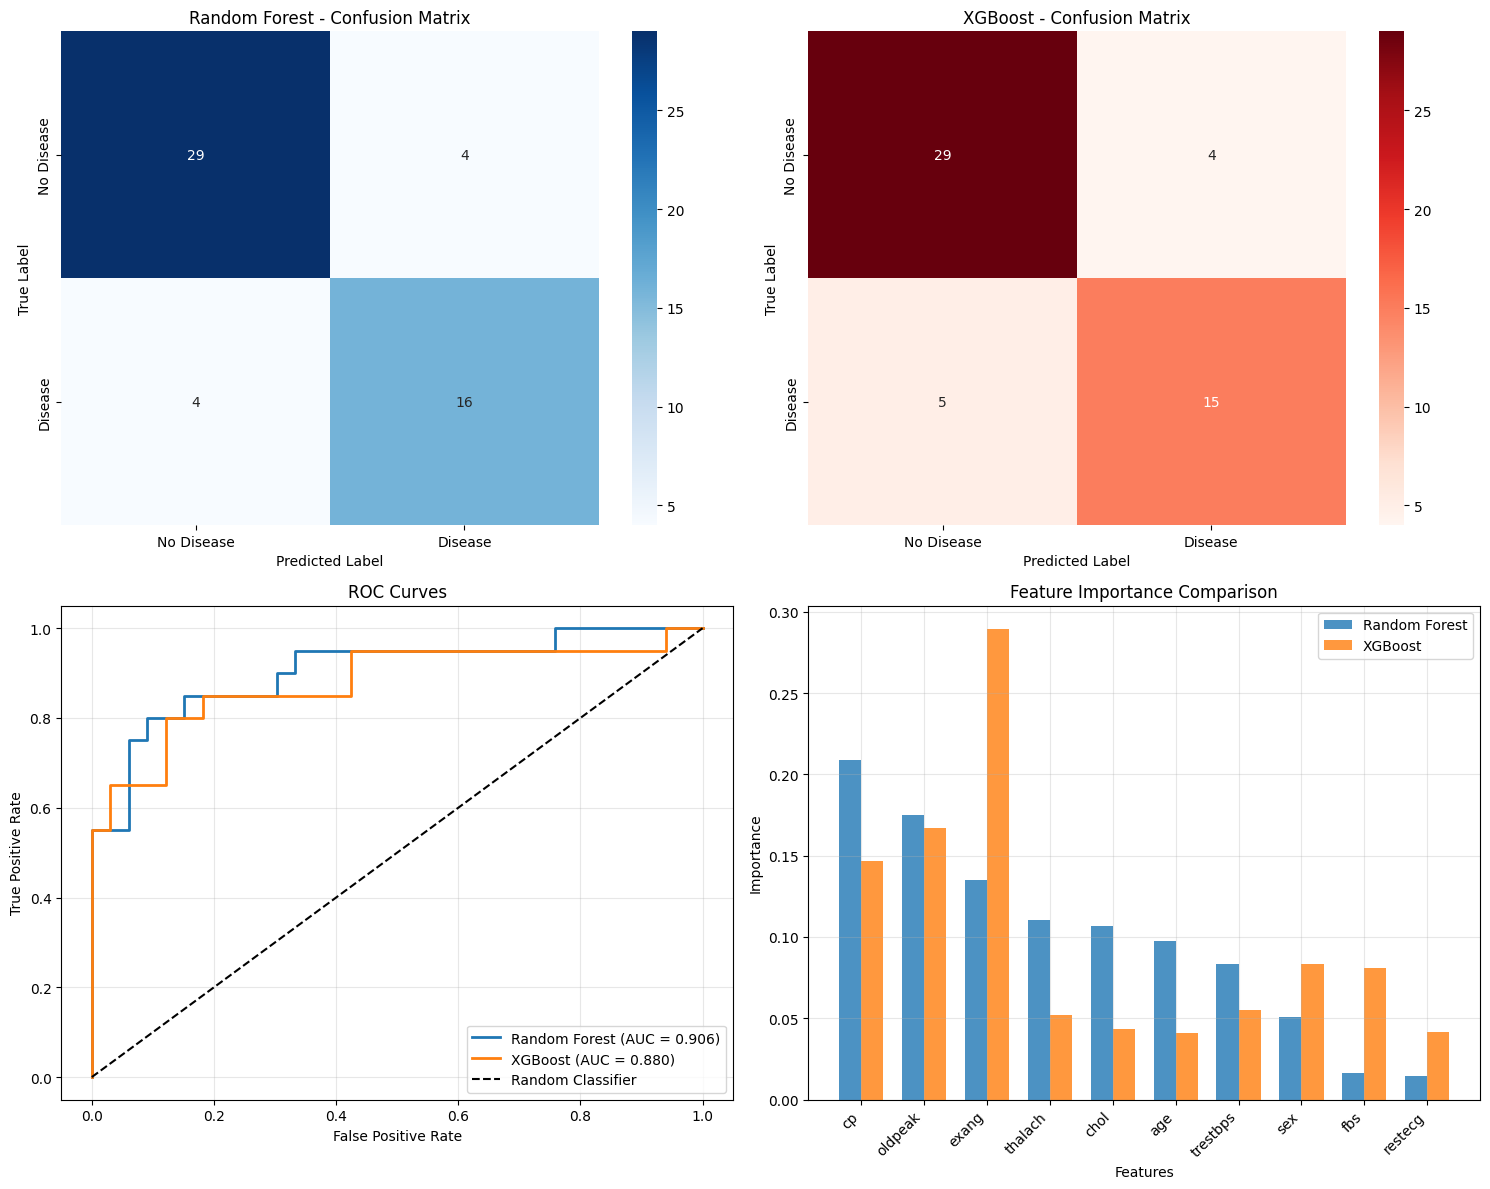

In [27]:
# Model comparison
print("📈 Model Comparison Summary:")
print("=" * 50)
print(f"{'Model':<20} {'Accuracy':<12} {'ROC AUC':<12}")
print("-" * 50)
print(f"{'Random Forest':<20} {rf_accuracy:.4f}      {rf_auc:.4f}")
print(f"{'XGBoost':<20} {xgb_accuracy:.4f}      {xgb_auc:.4f}")

# Determine which model performed better
if rf_accuracy > xgb_accuracy:
    best_model = "Random Forest"
    best_accuracy = rf_accuracy
else:
    best_model = "XGBoost"
    best_accuracy = xgb_accuracy

print(f" Best Performing Model: {best_model} (Accuracy: {best_accuracy:.4f})")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
ax1.set_title('Random Forest - Confusion Matrix')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')

# 2. Confusion Matrix - XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', ax=ax2,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
ax2.set_title('XGBoost - Confusion Matrix')
ax2.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')

# 3. ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

ax3.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)
ax3.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.3f})', linewidth=2)
ax3.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves')
ax3.legend(loc='lower right')
ax3.grid(alpha=0.3)

# 4. Feature Importance Comparison
top_n = 10
top_features_rf = rf_feature_importance.head(top_n)
top_features_xgb = xgb_feature_importance.head(top_n)

# Create a combined feature importance plot
combined_features = set(top_features_rf['feature']).union(set(top_features_xgb['feature']))
importance_data = []

for feature in combined_features:
    rf_imp = top_features_rf[top_features_rf['feature'] == feature]['importance'].values
    xgb_imp = top_features_xgb[top_features_xgb['feature'] == feature]['importance'].values
    
    rf_val = rf_imp[0] if len(rf_imp) > 0 else 0
    xgb_val = xgb_imp[0] if len(xgb_imp) > 0 else 0
    
    importance_data.append({'feature': feature, 'RF': rf_val, 'XGB': xgb_val})

importance_df = pd.DataFrame(importance_data).sort_values('RF', ascending=False)

x = np.arange(len(importance_df))
width = 0.35

ax4.bar(x - width/2, importance_df['RF'], width, label='Random Forest', alpha=0.8)
ax4.bar(x + width/2, importance_df['XGB'], width, label='XGBoost', alpha=0.8)
ax4.set_xlabel('Features')
ax4.set_ylabel('Importance')
ax4.set_title('Feature Importance Comparison')
ax4.set_xticks(x)
ax4.set_xticklabels(importance_df['feature'], rotation=45, ha='right')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# performance analysis 

In [29]:
print("🎯 DEEP DIVE: Random Forest vs XGBoost Performance Analysis")
print("=" * 60)

# Calculate performance differences
accuracy_diff = rf_accuracy - xgb_accuracy
auc_diff = rf_auc - xgb_auc
accuracy_improvement = (accuracy_diff / xgb_accuracy) * 100
auc_improvement = (auc_diff / xgb_auc) * 100

print(f" Performance Advantage:")
print(f" Accuracy: +{accuracy_diff:.4f} ({accuracy_improvement:.1f}% improvement)")
print(f" ROC AUC: +{auc_diff:.4f} ({auc_improvement:.1f}% improvement)")

# Clinical significance analysis
print(f" Clinical Significance:")
print(f"  Random Forest correctly identifies {accuracy_diff * 100:.1f}% more patients")
print(f"  Better at ranking patients by risk (higher AUC = better risk stratification)")

# Check statistical significance (simple approach)
if accuracy_diff > 0.02:  # 2% difference is often considered meaningful
    print("  ✅ Difference is likely clinically significant")
else:
    print("  ⚠️  Difference may not be clinically significant")

print(f" Why Random Forest Might Be Performing Better:")
print("  1.  Better handling of your specific data distribution")
print("  2.  More robust to noise and outliers")
print("  3.  Built-in class balancing worked well")
print("  4.  Feature interactions are captured effectively")


🎯 DEEP DIVE: Random Forest vs XGBoost Performance Analysis
 Performance Advantage:
 Accuracy: +0.0189 (2.3% improvement)
 ROC AUC: +0.0258 (2.9% improvement)
 Clinical Significance:
  Random Forest correctly identifies 1.9% more patients
  Better at ranking patients by risk (higher AUC = better risk stratification)
  ⚠️  Difference may not be clinically significant
 Why Random Forest Might Be Performing Better:
  1.  Better handling of your specific data distribution
  2.  More robust to noise and outliers
  3.  Built-in class balancing worked well
  4.  Feature interactions are captured effectively


# Tnx for upvote